<a href="https://colab.research.google.com/github/dbsdlsdud/AIStudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망을 구성하는 절차
1. 더미데이터 준비(트레이닝용)
2. 훈련용, 검증용, 테스트용으로 나누기
3. 심층 만들기(dense)
4. model에 적용
5. 컴파일 진행(최적화기법을 적용 : adam 사용)
6. fit(훈련)
7. evaluate(검증)

* 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련 과정이 상세하게 출려되어 확인 할 수 있다.(에포크 횟수, 손실, 정확도) -> 아래쪽에 <keras.src.callbacks.history.History at 0x7cd1f7a0eaa0> 출력(실행 결과) 메세지가 나온다.
* 코렙 노트북에 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력한다.
* fit() 메서드는 History라는 클래스 객체를 반환 한 것이다 (훈련과정의 지표, 손실, 정확도 등이있다) 이 값을 잘 활용하면 그래프를 그릴 수 있다.

In [1]:
# 더미데이터 준비, 훈련,검증,테스트용 나누기
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
# \ : 엔터효과 제거 -> 한줄로 긴 문장 자름
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split (train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print('train',train_scaled.shape, train_target.shape)
print('test',test_input.shape, test_target.shape)
print('val',val_scaled.shape, val_target.shape)

train (48000, 28, 28) (48000,)
test (10000, 28, 28) (10000,)
val (12000, 28, 28) (12000,)


In [6]:
# 심층 만들기, 모델 적용하기
def model_fn(a_layer=None): # 모델을 만드는 간단한 함수 정의하기 (하나의 매개변수를 받아 리턴)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 입력층
    model.add(keras.layers.Dense(100, activation='relu')) # 은닉층

    # model_fn() 함수에 a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 하나의 층을 추가한다
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax')) # 출력층
    return model

In [7]:
model = model_fn() # 위에서 만든 메서드 호출하여 모델에 담음
model.summary() # 모델의 요약정보를 봄

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 컴파일 진행하기
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy']) # 컴파일(다중분류, 정확도)

In [13]:
# fit() 메서드 결과를 history 변수에 담음
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# 훈련과정 출력 조절
# verbose = 0 훈련과정을 나타내지 않음
# verbose = 1 기본값, 에포크마다 진행, 막대와 함게 손실등의 지표가 출력된다
# verbose = 2 진행막대 빼고 출력한다

In [14]:
print(history.history.keys())
# 훈련 측정값이 담겨있는 history 딕셔너리가 존재한다, 정확도 accuracy, 손실 loss값이 있다
# 정확도는 complie() 메서드의 metrics 매개변수에 accuracy를 추가 했기 때문에 history속성에 포함되어있다.

dict_keys(['accuracy', 'loss'])


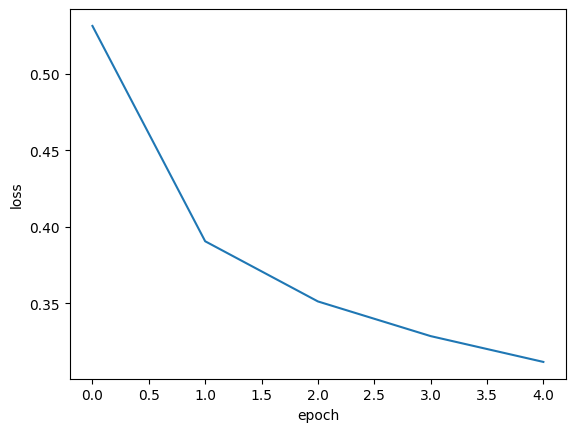

In [17]:
# 손실 출력
import matplotlib.pyplot as plt
# history속성에 포함된 손실과 정확도는 에포크마다 계산한 값이
# 순서대로 나열된 단순한 리스트로 맷플롯립으로 쉽게 그래프 처리가 가능하다.
plt.plot(history.history['loss'])
plt.xlabel('epoch') # 파이썬 인덱스는 0부터 시작, 5개의 에포크가 0~4까지 x축에 표현된다.
plt.ylabel('loss') # 손실된 값
plt.show() # 에포크마다 손실 감소

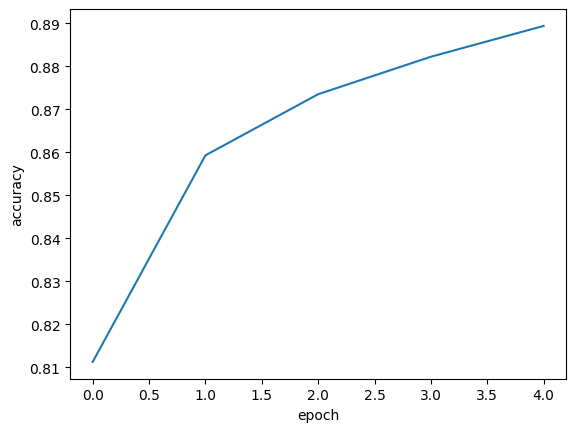

In [18]:
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show() # 에포크마다 정확도 향상

In [19]:
# 에포크 횟수 20으로 늘려보기
model = model_fn() # 위에서 만든 메서드로 모델 생성(3개층 : 입력,은닉,출력)
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


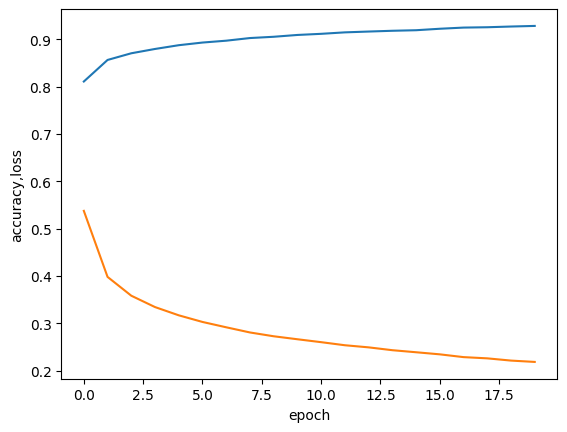

In [26]:
# 손실률, 정확도 출력
plt.plot(history.history['accuracy']) # 정확도 (파란색)
plt.plot(history.history['loss']) # 손실률 (주황색)
plt.xlabel('epoch') # 파이썬 인덱스는 0부터 시작, 5개의 에포크가 0~4까지 x축에 표현된다.
plt.ylabel('accuracy,loss') # 손실된 값
plt.show() # 에포크마다 손실 감소, 정확도 증가

# 검증손실
* 예전에 확률적 경사강법을 사용했을 때 과대/과소 적합과 에포크 사이에 관계 부분이 있었다. 인공신경망은 모두 일종의 경사하강법을 사용하기 때문에 동일한 개념이 여기에도 적용된다.

* 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증세트에 대한 점수도 필요하다. 그래서 위에 처럼 훈련세트에 손실과 정확도만 그리면 파악이 어렵다. 검증 손실을 이용해서 과대.과소 적합을 응용하겠다.

keypoint
* 손실을 사용하는 것과 정확도를 사용하는 것의 차이
    1. 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수다
    2. 손실감소에 비례하여 정확도가 높아지지 않는 경우도 있다
    3. 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실 함수의 값을 확인하는 것이 더 좋은 방법이다

In [29]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))
# verbose = 0 훈련과정을 나타내지 않음, verbose = 2 진행막대 빼고 출력한다
# verbose = 1 기본값, 에포크마다 진행, 막대와 함게 손실등의 지표가 출력된다

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7629 - loss: 0.6758 - val_accuracy: 0.8443 - val_loss: 0.4393
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8501 - loss: 0.4109 - val_accuracy: 0.8524 - val_loss: 0.4046
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8671 - loss: 0.3618 - val_accuracy: 0.8605 - val_loss: 0.3840
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8788 - loss: 0.3354 - val_accuracy: 0.8633 - val_loss: 0.3750
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8873 - loss: 0.3162 - val_accuracy: 0.8667 - val_loss: 0.3764
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8926 - loss: 0.3039 - val_accuracy: 0.8727 - val_loss: 0.3678
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8976 - loss: 0.2902 - val_accuracy: 0.8684 - val_loss: 0.3912
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9020 - loss: 0.2803 - 

In [30]:
print(history.history.keys())
# 정확도 accuracy, 손실 loss, 추가 검증세트 정확도 val_accuracy, 검증세트 손실 val_loss

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


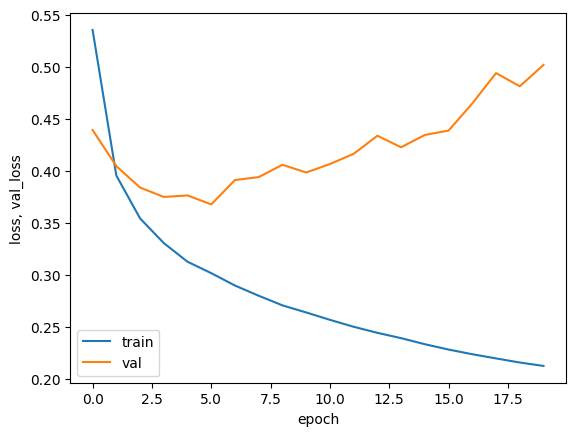

In [32]:
# 과대/과소 적합 문제를 조사하기위해 훈련손실,검증손실을 한 그래프에 그려서 비교해보자
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss, val_loss')
plt.legend(['train', 'val'])
plt.show()

결과 분석
* 초기에 검증손실이 감소하다가 다섯번째 에포크만에 다시 상승했고 훈련손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어졌다
* 검증손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고 검증세트에 대한 정확도가 증가할 것 같다
* 과대적합을 막기 위한 방법으로 예전에 사용했던 규제방식대신 신경망에 특화된 규제방법(드롭아웃)을 나중에 해보자

-
* 옵티마이저 하이퍼파라미터를 조절하여 과대적합 완화시켜보기
* RMSprop 옵티마이저는 많은 문제에서 잘 동작한다 -> 다른 방법으로는 Adam이 있다

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


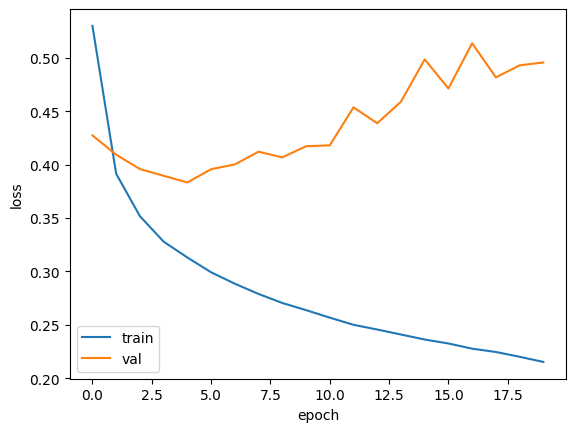

In [33]:
model = model_fn()
model.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

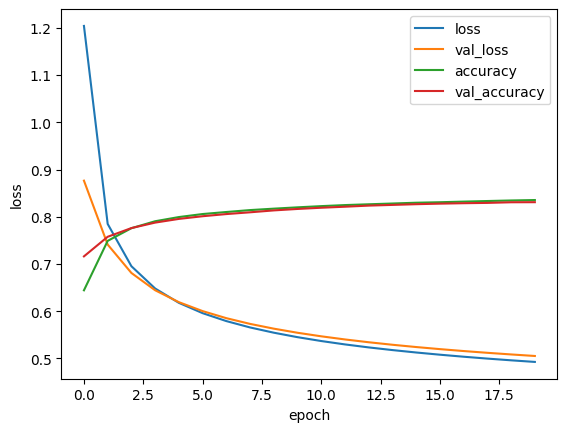

In [36]:
model = model_fn()
adagrad = keras.optimizers.Adagrad() # Adagrad기법으로 최적화 후 차트로 보기
model.compile(optimizer=adagrad,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


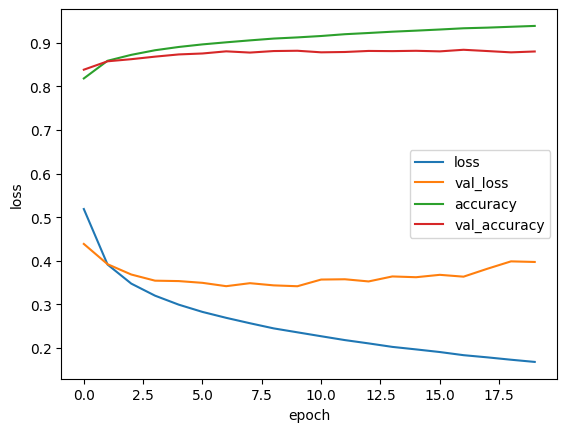

In [37]:
model = model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.show()